<a href="https://colab.research.google.com/github/utegenf/ML_basics/blob/main/first_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn numpy --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.7 MB 13.7 MB/s 
     |████████████████████████████████| 17.1 MB 56.1 MB/s 
     |████████████████████████████████| 16.9 MB 18.8 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn import tree
from sklearn.model_selection import train_test_split

# Figures inline and set visualization style
%matplotlib inline
sns.set()

df1 = pd.read_csv("file.csv")
journey = pd.read_excel ("journey.xlsx")
journey.to_csv ("journey.csv", index = None, header=True)

In [4]:
df1.head()

,leafversion,activedays,preferredinteractionperiod,timezone,JourneyChange,LastActive,currentjourney,ActiveJourney
0,22.6.10,24.0,NaN,Europe/Vatican,2021-03-19,NaN,M365_Intro,1
1,22.6.10,27.0,NaN,Europe/Vatican,2021-02-11,NaN,M365_Intermediate,1
2,22.6.10,27.0,NaN,Europe/Vatican,2021-02-11,NaN,M365_Intermediate,1
3,22.6.10,41.0,NaN,Europe/Vatican,2021-02-09,NaN,M365_Intermediate,1
4,22.6.10,41.0,NaN,Europe/Vatican,2021-02-09,NaN,M365_Intermediate,1


In [5]:
journey.head()

,id,internalName,name,totalDays,totalPrimes,totalScheduledPrimes,totalScheduledSlots,totalFlowsPrimes,totalSinglePrimes,totalUnassignedPrimes,totalNudges,totalTriggers,totalMaterials,totalExternalLinks
0,658d8937-04ba-4b12-9786-69724bd6fa2f,[INVITALIA] Percorso avanzato,Le funzioni avanzate di Microsoft 365,51,54,1,1,9,45,17,113,8,98,2
1,3af5a908-d02a-4498-8501-0407a03c583e,[INVITALIA] Percorso Base,Alla scoperta di Microsoft 365,69,53,1,1,10,43,1,113,8,114,2
2,9ea2e822-c863-4398-a985-ba2bf750a75a,[MAIN] Davide's demo with content - ENG NEW,Demo DavideC (Copy),45,42,1,1,14,28,2,39,11,26,9
3,c9a3868e-189f-4c37-a712-a5ba3799edce,[ANGELINI] Cybersecurity,Scopri l'importanza della privacy con hi!,26,15,0,0,3,12,0,76,11,13,0
4,8f2ad317-8b49-4592-a429-92a2e838ad50,[ILLIMITY] Comunicazione,Scopri con hi come comunicare meglio!,21,11,0,0,9,2,0,60,7,31,1


In [6]:
df = pd.merge(df1, journey, left_on="currentjourney", right_on="id")
df.head()

,leafversion,activedays,preferredinteractionperiod,timezone,JourneyChange,LastActive,currentjourney,ActiveJourney,id,internalName,...,totalPrimes,totalScheduledPrimes,totalScheduledSlots,totalFlowsPrimes,totalSinglePrimes,totalUnassignedPrimes,totalNudges,totalTriggers,totalMaterials,totalExternalLinks
0,22.6.10,24.0,NaN,Europe/Vatican,2021-03-19,NaN,M365_Intro,1,M365_Intro,NaN,...,8,0,0,5,3,0,16,7,10,4
1,22.6.10,24.0,NaN,Europe/Vatican,2021-03-19,NaN,M365_Intro,1,M365_Intro,NaN,...,8,0,0,5,3,0,16,7,10,5
2,22.6.10,12.0,EARLY_MORNING,Europe/Vatican,2021-03-19,NaN,M365_Intro,1,M365_Intro,NaN,...,8,0,0,5,3,0,16,7,10,4
3,22.6.10,12.0,EARLY_MORNING,Europe/Vatican,2021-03-19,NaN,M365_Intro,1,M365_Intro,NaN,...,8,0,0,5,3,0,16,7,10,5
4,22.6.10,12.0,EARLY_MORNING,Europe/Vatican,2021-03-19,NaN,M365_Intro,1,M365_Intro,NaN,...,8,0,0,5,3,0,16,7,10,4


In [7]:
df = df.loc[:, ['leafversion', 'activedays', 'preferredinteractionperiod', 'timezone', 'JourneyChange', 'LastActive', 'totalDays']]
df.head()

,leafversion,activedays,preferredinteractionperiod,timezone,JourneyChange,LastActive,totalDays
0,22.6.10,24.0,NaN,Europe/Vatican,2021-03-19,NaN,15
1,22.6.10,24.0,NaN,Europe/Vatican,2021-03-19,NaN,15
2,22.6.10,12.0,EARLY_MORNING,Europe/Vatican,2021-03-19,NaN,15
3,22.6.10,12.0,EARLY_MORNING,Europe/Vatican,2021-03-19,NaN,15
4,22.6.10,12.0,EARLY_MORNING,Europe/Vatican,2021-03-19,NaN,15


In [8]:
df['Zone'] = df['timezone'].str.split('/').str[0]

In [9]:
df.drop('timezone', axis=1, inplace=True)
df.head()

,leafversion,activedays,preferredinteractionperiod,JourneyChange,LastActive,totalDays,Zone
0,22.6.10,24.0,NaN,2021-03-19,NaN,15,Europe
1,22.6.10,24.0,NaN,2021-03-19,NaN,15,Europe
2,22.6.10,12.0,EARLY_MORNING,2021-03-19,NaN,15,Europe
3,22.6.10,12.0,EARLY_MORNING,2021-03-19,NaN,15,Europe
4,22.6.10,12.0,EARLY_MORNING,2021-03-19,NaN,15,Europe


In [10]:
def conditions(df):
    if (df['activedays']>=df['totalDays']):
        return 1
    else:
        return 0

In [11]:
df['Finished'] = df.apply(conditions, axis=1)

In [12]:
df.head()

,leafversion,activedays,preferredinteractionperiod,JourneyChange,LastActive,totalDays,Zone,Finished
0,22.6.10,24.0,NaN,2021-03-19,NaN,15,Europe,1
1,22.6.10,24.0,NaN,2021-03-19,NaN,15,Europe,1
2,22.6.10,12.0,EARLY_MORNING,2021-03-19,NaN,15,Europe,0
3,22.6.10,12.0,EARLY_MORNING,2021-03-19,NaN,15,Europe,0
4,22.6.10,12.0,EARLY_MORNING,2021-03-19,NaN,15,Europe,0


In [13]:
df.dtypes


leafversion                    object
activedays                    float64
preferredinteractionperiod     object
JourneyChange                  object
LastActive                     object
totalDays                       int64
Zone                           object
Finished                        int64
dtype: object

In [14]:
df['JourneyChange'] = df['JourneyChange'].astype('datetime64[ns]')
df['LastActive'] = df['LastActive'].astype('datetime64[ns]')

df['got_activated'] = (df['JourneyChange'] - df['LastActive']).dt.days
df['LastActivity'] = df['LastActive'] - pd.Timestamp.now().normalize()
df['LastActivity'] = df['LastActivity'].dt.days
df.drop('LastActive', axis=1, inplace=True)
df.drop('JourneyChange', axis=1, inplace=True)
df.head()

,leafversion,activedays,preferredinteractionperiod,totalDays,Zone,Finished,got_activated,LastActivity
0,22.6.10,24.0,NaN,15,Europe,1,NaN,NaN
1,22.6.10,24.0,NaN,15,Europe,1,NaN,NaN
2,22.6.10,12.0,EARLY_MORNING,15,Europe,0,NaN,NaN
3,22.6.10,12.0,EARLY_MORNING,15,Europe,0,NaN,NaN
4,22.6.10,12.0,EARLY_MORNING,15,Europe,0,NaN,NaN


In [15]:
def conditions1(df):
    if (df['LastActivity'] > 7) and (df['got_activated'] >0):
        return 0
    else:
        return 1

In [16]:
df['Dead_Alive_7_Days'] = df.apply(conditions1, axis=1)

In [17]:
df.drop('totalDays', axis=1, inplace=True)
df.drop('got_activated', axis=1, inplace=True)
df.drop('LastActivity', axis=1, inplace=True)


df.head()

,leafversion,activedays,preferredinteractionperiod,Zone,Finished,Dead_Alive_7_Days
0,22.6.10,24.0,NaN,Europe,1,1
1,22.6.10,24.0,NaN,Europe,1,1
2,22.6.10,12.0,EARLY_MORNING,Europe,0,1
3,22.6.10,12.0,EARLY_MORNING,Europe,0,1
4,22.6.10,12.0,EARLY_MORNING,Europe,0,1


In [18]:
df.isnull().sum()

leafversion                     4
activedays                      2
preferredinteractionperiod    384
Zone                          160
Finished                        0
Dead_Alive_7_Days               0
dtype: int64

In [26]:
feature_cols = ['leafversion', 'preferredinteractionperiod', 'Zone', 'activedays', 'Dead_Alive_7_Days']
X = df[feature_cols] # Features
y = df.Finished # Target variable

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [28]:
X_train.shape, X_test.shape

((684, 5), (294, 5))

In [22]:
!pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 785 kB/s 


In [29]:
X_train.head()

,leafversion,preferredinteractionperiod,Zone,activedays,Dead_Alive_7_Days
785,22.6.10,DEFAULT,NaN,0.0,1
718,22.6.10,DEFAULT,NaN,0.0,1
578,22.6.10,LATE_MORNING,Europe,82.0,1
826,23.99.0,DEFAULT,Europe,0.0,1
134,22.6.10,NaN,Europe,14.0,1


In [30]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['leafversion', 'preferredinteractionperiod', 'Zone', 'activedays'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [35]:
X_train.head()

,leafversion,preferredinteractionperiod,Zone,activedays,Dead_Alive_7_Days
785,1,1,1,1,1
718,1,1,1,1,1
578,1,2,2,2,1
826,2,1,2,1,1
134,1,3,2,3,1


In [32]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


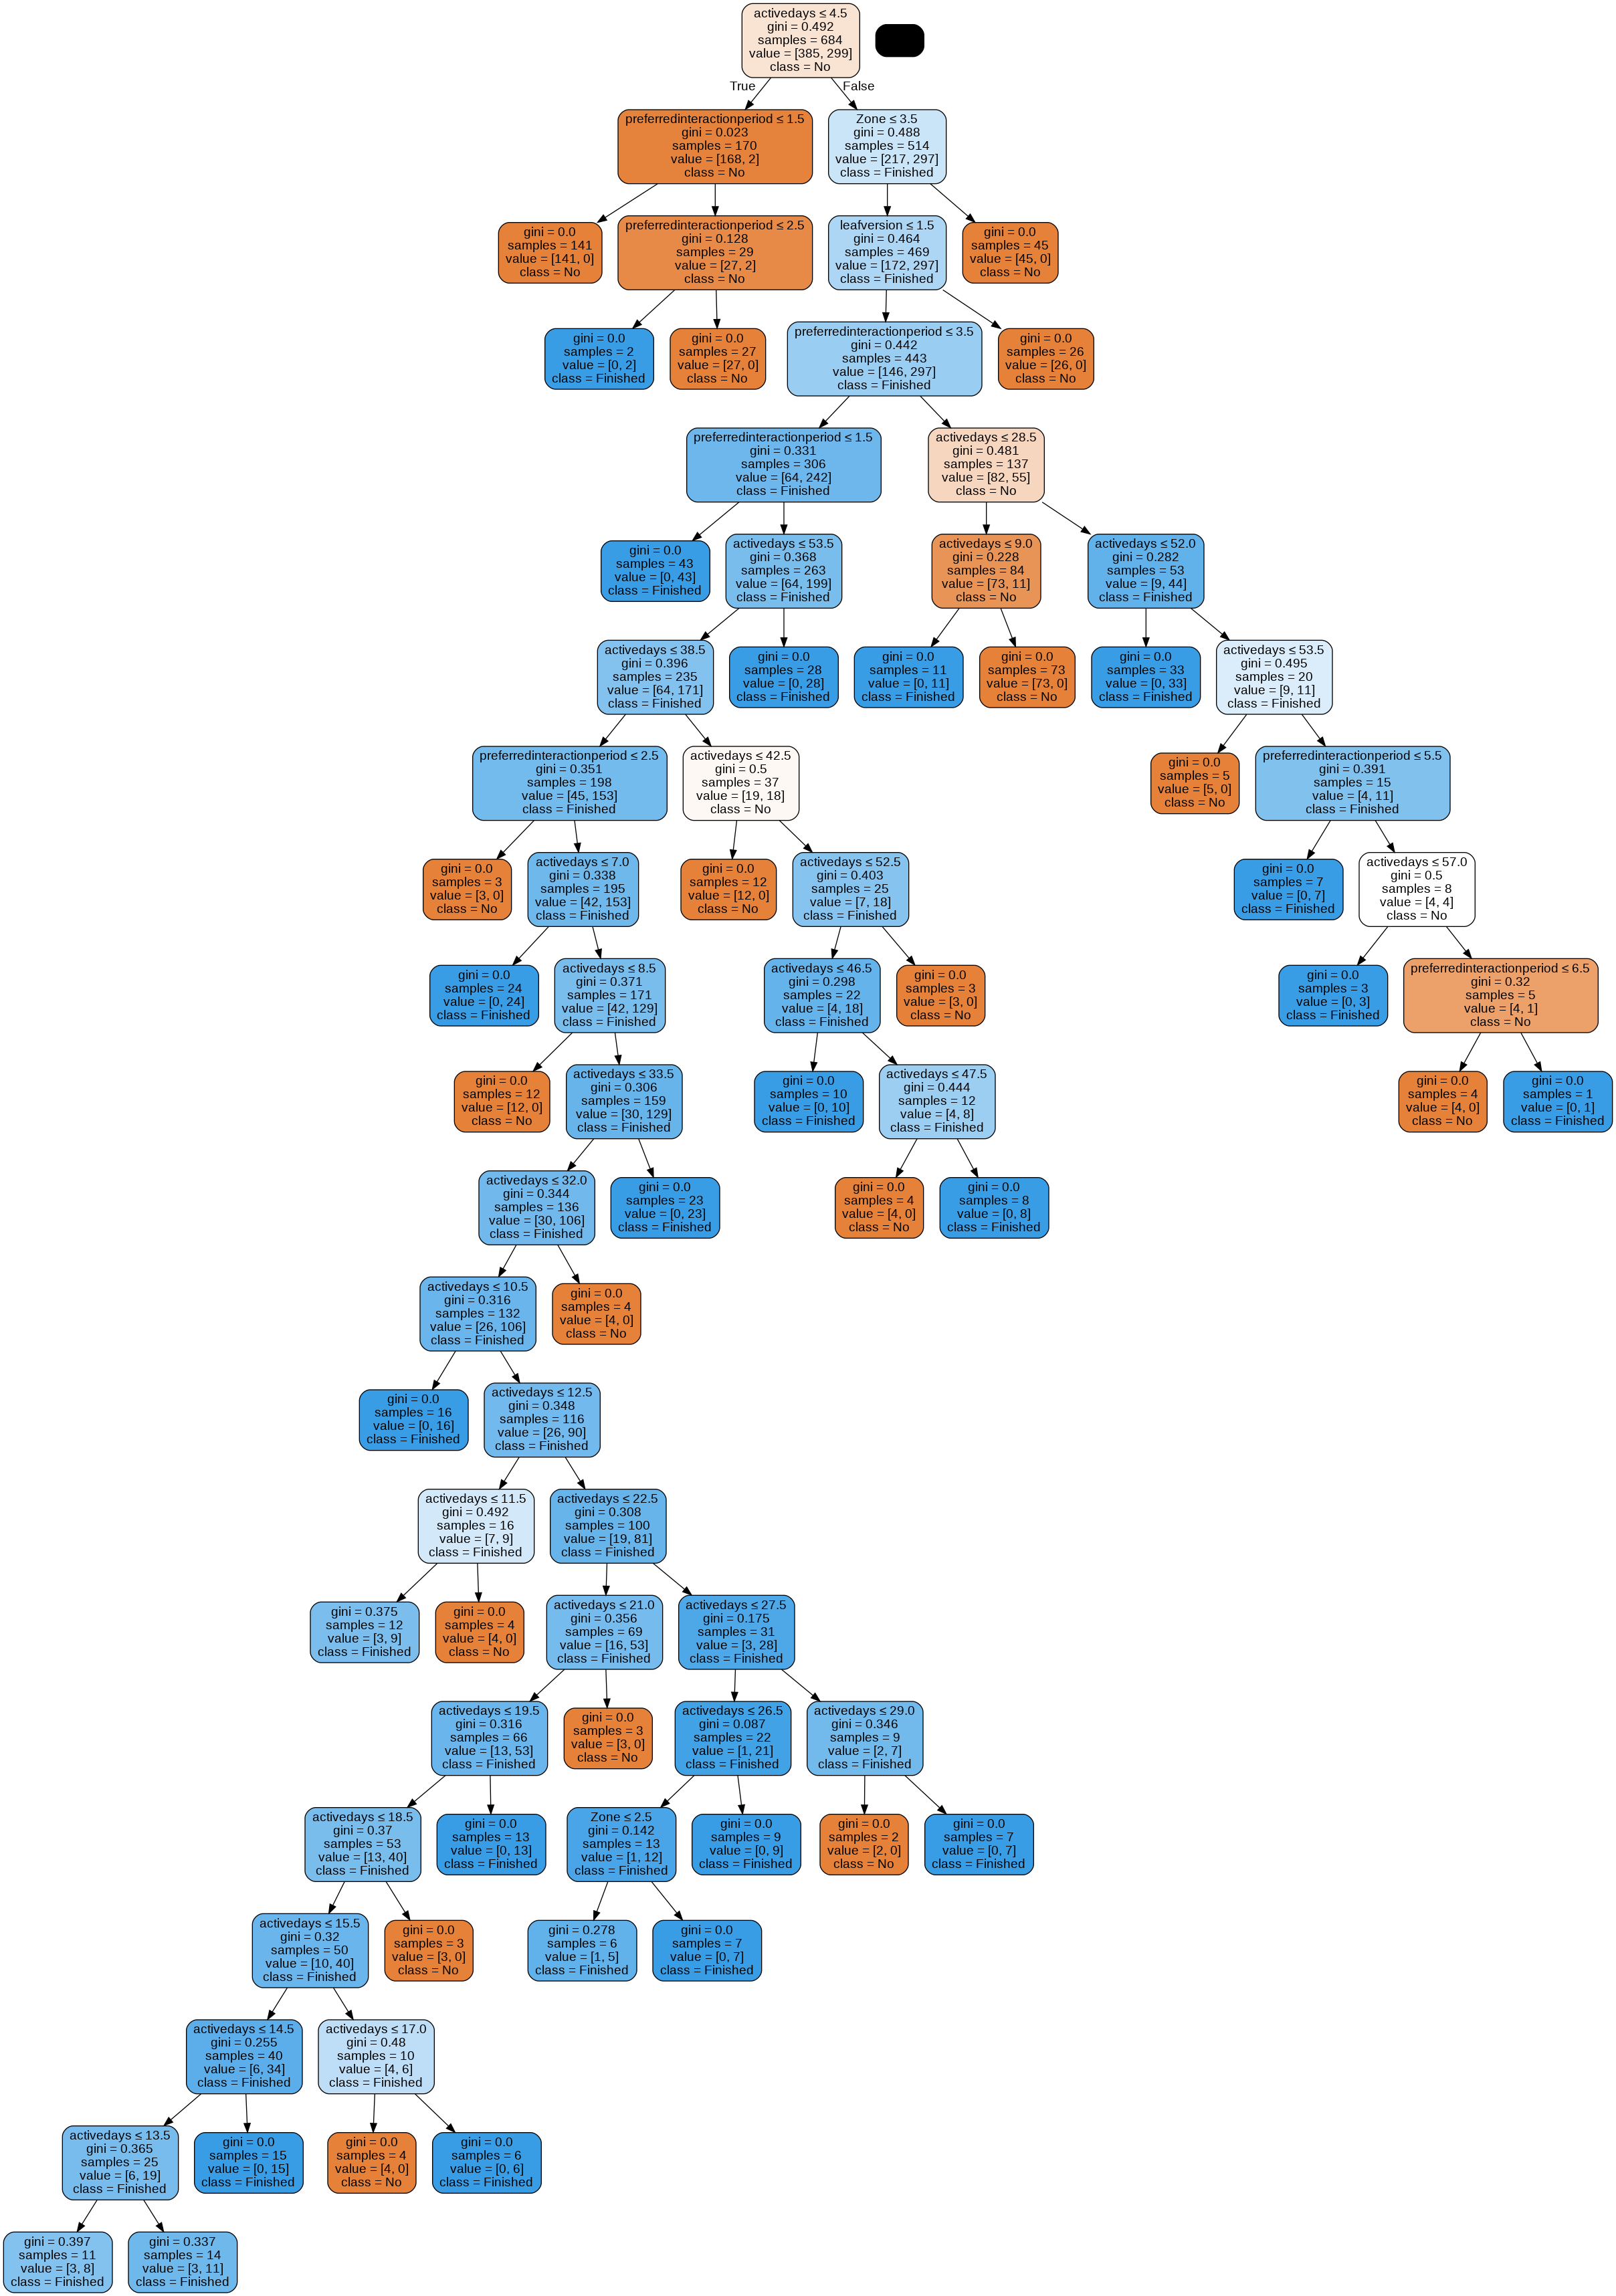

In [34]:
from sklearn.tree import export_graphviz
from six import StringIO

from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['No','Finished'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hi.png')
Image(graph.create_png())

In [36]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)

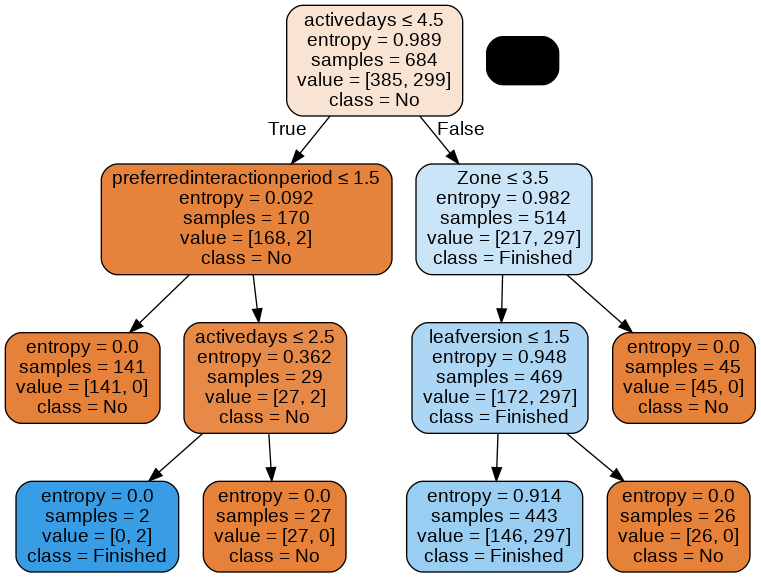

In [37]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['No','Finished'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hi.png')
Image(graph.create_png())